## Find the Al lattice constant by minimising the total energy

Find the lattice constant that minimises the DFT total crystal internal energy:

$$
\text{min}_a \left\{U_0(a)\right\} \,.
$$

This value should be close the experimental lattice parameter the perfect crystal in the low temperature limit, albeit with errors due to pressure $p_0a^3$, phonon zero-point effects, and exchange-correlation errors.

#### Import libraries and data, and examine data

In [8]:
#Import python libraries for plotting, workin with arrays, fitting and optimisation
import numpy as np
import scipy.optimize as so
import matplotlib.pyplot as plt

In [9]:
#Set the directory to import the data from and load the data
dir="/Users/thomasmellan/Documents/teaching/computationalthermodynamics/lab02/.toMake/07_al_lattice_constant/"
alat_u0=np.loadtxt(dir+"aLatt_energy_noheader.dat")
alat_u0

array([[  3.7       , -39.47519682],
       [  3.8       , -39.48943375],
       [  3.9       , -39.49765444],
       [  4.        , -39.50112037],
       [  4.1       , -39.50092796],
       [  4.2       , -39.49797766],
       [  4.3       , -39.49298603],
       [  4.4       , -39.4865393 ],
       [  4.5       , -39.47909906],
       [  4.6       , -39.47102079],
       [  4.7       , -39.46255991]])

[3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7] [-39.47519682 -39.48943375 -39.49765444 -39.50112037 -39.50092796
 -39.49797766 -39.49298603 -39.4865393  -39.47909906 -39.47102079
 -39.46255991]


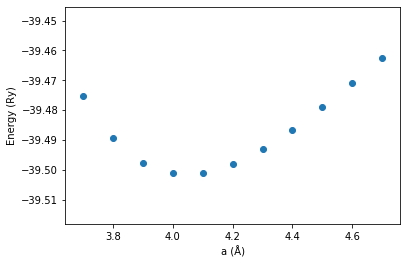

In [10]:
#Seperate the 2d array into 2 1d arrays, so it is easier to plot and work with
alat, u0 = alat_u0[:,0], alat_u0[:,1]
print(alat, u0)

plt.scatter(alat, u0)
plt.xlabel("a (Å)")
plt.ylabel("Energy (Ry)")
plt.show()

#### Fit polynomial to data

Fit:          4         3         2
0.06074 x - 1.134 x + 7.964 x - 24.83 x - 10.55
Coefs: [  0.06073896  -1.13427237   7.96442707 -24.83446481 -10.54986277]


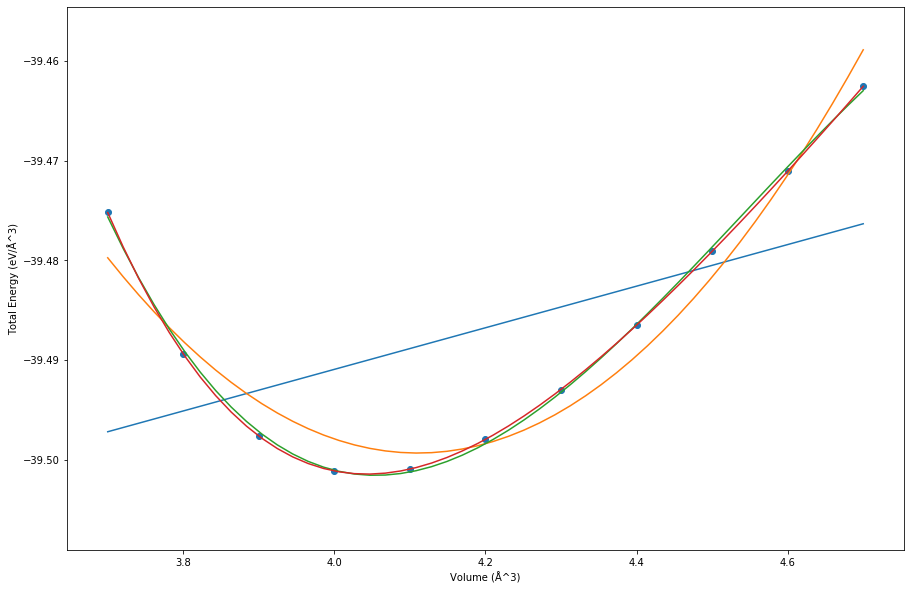

In [12]:
#Make a function to fit polynomials to the data. Plot the fits along with the original data.
def polynomial_fit(x, y, order,printing=False):
    
    coefs = np.polyfit(x, y, order)
    fit = np.poly1d(coefs)
    if printing == True:
        print("Fit:", fit)
        print("Coefs:", coefs)
    return fit

u0_volume_al_fit1 = polynomial_fit(alat, u0, 1)
u0_volume_al_fit2 = polynomial_fit(alat, u0, 2)
u0_volume_al_fit3 = polynomial_fit(alat, u0, 3)
u0_volume_al_fit4 = polynomial_fit(alat, u0, 4,True)

fig=plt.figure(figsize=(15, 10))
plt.scatter(alat, u0)
plt.plot(np.linspace(3.7, 4.7), u0_volume_al_fit1(np.linspace(3.7, 4.7)))
plt.plot(np.linspace(3.7, 4.7), u0_volume_al_fit2(np.linspace(3.7, 4.7)))
plt.plot(np.linspace(3.7, 4.7), u0_volume_al_fit3(np.linspace(3.7, 4.7)))
plt.plot(np.linspace(3.7, 4.7), u0_volume_al_fit4(np.linspace(3.7, 4.7)))
plt.xlabel("Volume (Å^3)")
plt.ylabel("Total Energy (eV/Å^3)")
plt.show()

#### Find minimum energy lattice parameter

In [13]:
#Use the scipy.optimize routine to find the mininmum of the fit
min4th  = so.minimize(u0_volume_al_fit4,x0=4.3)
print(min4th)

#The minimum occurs at alat = 
min4th.x

      fun: -39.501462809611574
 hess_inv: array([[3.05451638]])
      jac: array([-4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.04299921])


array([4.04299921])

In [14]:
#Make a function to find the optimum lattice parameter for different fit orders
def find_alatt(x, y, order):
    fit = polynomial_fit(x, y, order)
    alat=so.minimize(fit,x0=4.3)
    return np.array([order, alat.x[0]])

order_alat=np.array([find_alatt(alat, u0, order) for order in range(2,6)]).T
print(order_alat)

[[2.         3.         4.         5.        ]
 [4.11033036 4.05438914 4.04299921 4.04292971]]


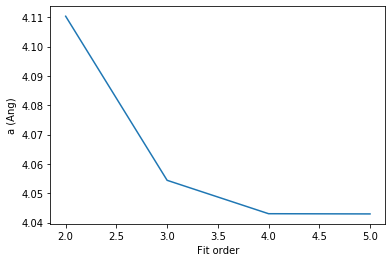

In [15]:
#Plot lattice parameter vs fit order
plt.plot(*order_alat)
plt.xlabel("Fit order")
plt.ylabel("a (Ang)")
plt.show()

According to the literature[1], the experimental lattice constant is around 4.046 Å. 

[1] https://journals.aps.org/pr/abstract/10.1103/PhysRev.25.753